# Dynamic Programming

: 상향식( bottom-up ) 문제 해결 전략으로 작은 부분 문제들의 해를 먼저 찾은 것을 기록하면서 최종 해를 찾는 방법
- Dynamic : 테이블 갱신
- Programming : 테이블에 course 기록(table-filling)
- 즉, Divide and Conquer Algorithm을 적은 시간 복잡도로 풀기 위해서 사용❗️

## ✅ Dynamic Programming 사용 조건

- **Overlapping Sub-problem Property**

  : 특정 문제를 분할 정복 시, 분할된 부분 문제들이 완벽히 동일하게 중복으로 존재해야함 
    - disjoint sub-problem property 예시 : Factorial, Merge Sort, Quick Sort, Binary Search 등은 중복된 부분문제가 존재하지 않음

- **Optimal Sub-problem(Structure) Property**

  : 특정 문제를 분할 정복 시, 해당 문제에 대한 최적 해가 분할된 부분 문제들의 최적해들로 구성되어야 함
    - Non-optimal sub-problem property 예시 : 가중치 그래프에서 시작 정점으로부터 도착 정점까지의 가중치 합이 최대가 되는 경로를 찾는 문제

🧐❔ **Greedy Choice Property**와 **Optimal Sub-structure Property** 구분
- Optimal Sub-structure Property : 최적인 최종 해를 살펴보니 부분 문제들의 최적 해들로 구성되어 있는것
- Greedy Choice Property : 부분 문제들의 최적해를 찾다보니 최적인 최종해를 찾은 것

<br>

## Divide and Conquer Algorithm과 비교
: 복잡한 problem을 간단한 sub-problem들로 분할하여 부분해를 찾은 후, **재사용을 위해 tabulation하는 과정을 반복**하여 이들을 통합하여 원래 문제의 solution을 찾는 전략
+ Divide and Conquer Algorithm은 하향식( top-down ) 방식으로 위에서 시작하여 문제의 최종해를 찾음


## Greedy Algorithm과 비교
: 일련의 local solution 선택이 필요한 problem이 주어졌을 때, sub-problem마다 **기록된 이전의 모든 선택들에 대해 고려**하여 최적의 부분해를 선택함으로써 global solution을 도출하는 알고리즘
- 두개 모두 최적화 문제 해결에 주로 사용되는 전략

<br>

## 👉 Fibonacci Number

### 1️⃣ Divide and Conquer Algorithm ( Recursion )


T(n) : fibo(n)을 계산하기 위하여 fibo() 함수를 호출하는 횟수

    T(0) = 1
    T(1) = 1
    T(n) = T(n-1) + T(n-2) 
         > 2 x T(n-2)
         > 2 x 2 x T(n-4)
         ...
         > 2 x 2 x ... x 2 x T(0) 
         = 2^(n/2) 

In [ ]:
def fibo(n) :
  if n == 0 or n == 1 :
    return n
  else :
    return fibo(n-1) + fibo(n-2)

### 2️⃣ Memoization
: 하향식 동적 프로그래밍이라고 지칭하는 경우도 있지만, 엄밀히 말하면 동적 프로그래밍 아님

T(n) : fibo(n)을 계산하기 위하여 fibo() 함수를 호출하는 횟수

    T(n) = T(n-1) + 1 ( ❔ 1 = 기록된 T(n-2)의 결과 접근 시간 )
         = T(n-2) + 2
         ...
         = T(0) + n
         = n + 1

In [ ]:
cache = {}

def fibo(n):
  if n in cache : 
    return cache[n]
  if n == 0 or n == 1 :
    result = b
    cache[n] = result
    return cache[n]
  result = fibo( n-1 ) + fibo( n-2 )
  cache[n] = result

### 3️⃣ Dynamic Programming

In [ ]:
def fibo(n) :
  memo = [0 for _ in range(n+1)]
  memo[1] = 1
  for i in range(2, n+1):
    memo[i] = memo[i-1] + memo[i-2]
  return memo[n]

<br>

## 👉 Minimum Cost in 2D Matrix

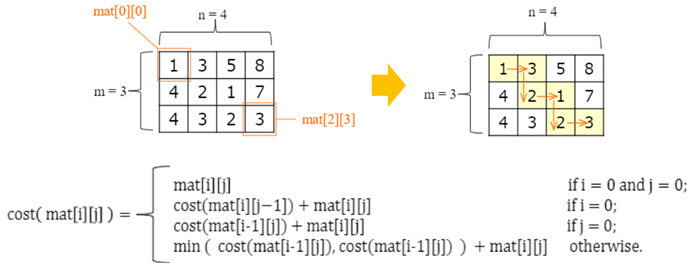

### 1️⃣ Divide and Conquer Algorithm


In [ ]:
M, N = 3, 4
 
def get_min(a, b):
  return a if a<b else b

def min_cost_recursion(mat, i, j):
  if i == 0 and j == 0 :
    return mat[0][0]

  if i == 0 :
    return min_cost_recursion(mat, 0, j-1) + mat[0][j]

  if j == 0 :
    return min_cost_recursion(mat, i-1, 0) + mat[i][0]
    
  a = min_cost_recursion(mat, i-1, j)
  b = min_cost_recursion(mat, i, j-1)

  return get_min(a,b) + mat[i][j]

mat = [[1,3,5,8], [4,2,1,7], [4,3,2,3]]
print(min_cost_recursion(mat, M-1, N-1))

12


### 2️⃣ Memoization

In [ ]:
M, N = 3, 4
cache = [[0]*N for i in range(0, M)]

def get_min(a, b):
  return a if a<b else b

def min_cost_memo(mat, i, j):
  if cache[i][j] != 0 :
    return cache[i][j]

  if i == 0 and j == 0 :
    cache[i][j] = mat[0][0]
    return cache[i][j]

  if i == 0 :
    cache[i][j] = min_cost_memo(mat, 0, j-1) + mat[0][j]
    return cache[i][j]

  if j == 0 :
    cache[i][j] = min_cost_memo(mat, i-1, 0) + mat[i][0]
    return cache[i][j]

  else : 
    a = min_cost_memo(mat, i-1, j)
    b = min_cost_memo(mat, i, j-1)
    cache[i][j] = get_min(a,b) + mat[i][j]
    
  return cache[i][j]

mat = [[1,3,5,8], [4,2,1,7], [4,3,2,3]]
print(min_cost_memo(mat, M-1, N-1))

12


### 3️⃣ Dynamic Programming

In [ ]:
M, N = 3, 4

def get_min(a, b):
  return a if a<b else b

def min_cost_dp(mat, i, j):
  cache = [[0]*N for i in range(0, M)]
  cache[0][0] = mat[0][0]

  for j in range(0, N) :
    cache[0][j] = cache[0][j-1] + mat[0][j]
  for i in range(0, M) :
    cache[i][0] = cache[i-1][0] + mat[i][0]
  for i in range(1, M) :
    for j in range(1, N) :
      cache[i][j] = get_min(cache[i-1][j], cache[i][j-1]) + mat[i][j]
      
  return cache[M-1][N-1]

mat = [[1,3,5,8], [4,2,1,7], [4,3,2,3]]
print(min_cost_dp(mat, M-1, N-1))

12


<br>

## 👉 Coin Change

: **Dynamic Programming**을 사용하면 최적의 해를 찾을 수 **있음** 
- **Greedy Algorithm**을 사용하면 항상 최적의 해는 찾을 수 **없음**

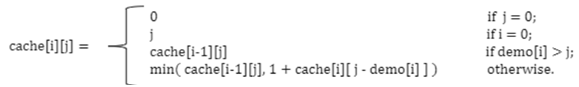

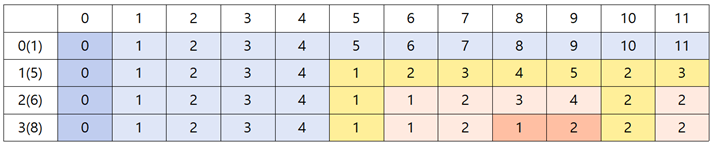

In [ ]:
def get_min(a, b):
  return a if a < b else b

def coin_change(demo, n): # O(n^2)
  k = len(demo)
  cache = [[0]*(n+1) for i in range(0, k)]

  for i in range(0, k):
    cache[i][0] = 0
  
  for j in range(1, n+1):
    cache[0][j] = j

  for i in range(1, k):
    for j in range(1, n+1):
      if demo[i] > j :
        cache[i][j] = cache[i-1][j]
      else : 
        cache[i][j] = get_min( cache[i-1][j], 1 + cache[i][j - demo[i]] )
  
  print_coin_change(demo, cache, n)

  return cache[k-1][n]

def print_coin_change(demo, cache, n):
  i = len(demo) - 1
  j = n
  
  print("Cache")
  for n in range(i):
    print(cache[n])

  print("\n사용된 동전 :", end = ' ')
  while j != 0 :
    if cache[i-1][j] == cache[i][j] and i > 0 :
      i = i-1
    else :
      print(demo[i], end = ' ')
      j = j - demo[i]

demo = [1,5,6,8]
coin_change(demo, 11)

Cache
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3]
[0, 1, 2, 3, 4, 1, 1, 2, 3, 4, 2, 2]

사용된 동전 : 6 5 

2

<br>

## 👉 Weighted Job Scheduling Problem

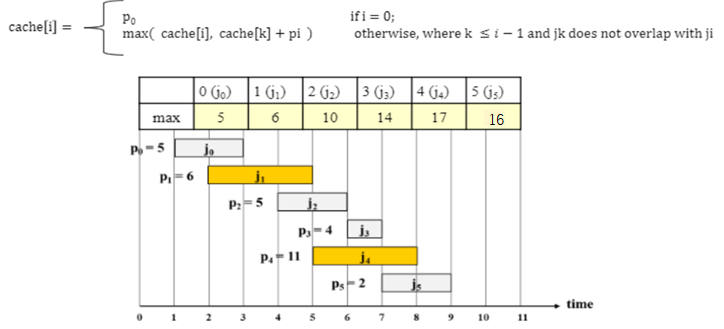

In [ ]:
def weighted_job_scheduling(JOB):
  JOB.sort(key = lambda x : x[2]) 
  cache = [JOB[i][3] for i in range(len(JOB))] 

  for i in range(0, len(JOB)): 
    for j in range(i):
      if JOB[i][1] >= JOB[j][2] :
        if cache[j] + JOB[i][3] > cache[i] :
          cache[i] = cache[j] + JOB[i][3]
  
  max_weight = 0
  for i in range(len(cache)):
    if cache[i] > max_weight :
      max_weight = cache[i]

  print("Cache :", cache)
  print("Weighted Job Scheduling Solution :", max_weight)

  return cache

JOB = [['F',7,9,2], ['A',1,3,5], ['D',6,7,4], ['B',2,5,6], ['C',4,6,5],  ['E',5,8,11]]
cache = weighted_job_scheduling(JOB)

Cache : [5, 6, 10, 14, 17, 16]
Weighted Job Scheduling Solution : 17
